In [1]:
from collections import defaultdict

from dbpedia import DBPedia
import utils

wrapper = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

['http://dbpedia.org/resource/Book', 'http://dbpedia.org/resource/Towel', 'http://dbpedia.org/resource/Mug', 'http://dbpedia.org/resource/Bed']
types []
all types {'http://dbpedia.org/resource/Set'}
types ['http://dbpedia.org/ontology/MusicalWork']
all types {'http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/resource/Piece'}
types ['http://dbpedia.org/ontology/SportsEvent']
all types {'http://dbpedia.org/resource/Container', 'http://dbpedia.org/ontology/Software', 'http://dbpedia.org/resource/Tool', 'http://dbpedia.org/ontology/SportsEvent', 'http://dbpedia.org/resource/Cup', 'http://dbpedia.org/ontology/Company'}
types ['http://dbpedia.org/ontology/MusicalWork']
all types {'http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/resource/Piece'}


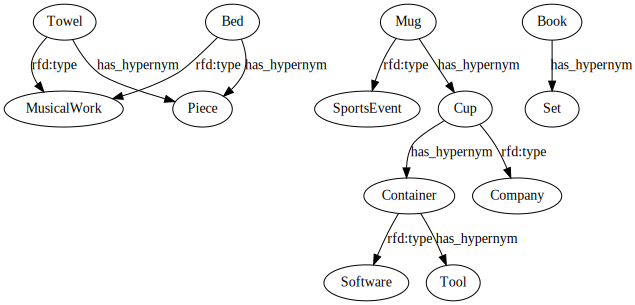

In [2]:
things = ['book', 'bath towel', 'coffee mug', 'bed']
things = [wrapper.get_id(el) for el in things]
print(things)
all_edges = set()
for w in things:
    types = wrapper.get_types(w, False)
    print('types', types)
    all_types, edges = wrapper.get_all_types(w, False)
    print('all types', all_types)
    #g = graph_utils.create_graph(edges)
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [3]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma) 
print(frame_lemmas)

{'mustard', 'bed', 'remote', 'message', 'sink', 'coke', 'beer', 'detergent', 'vase', 'mobile', 'aspirin', 'bin', 'milk', 'control', 'cereal', 'fridge', 'pasta', 'magazine', 'apple', 'paper', 'folder', 'can', 'one', 'pot', 'jacket', 'cup', 'cellphone', 'tray', 'roll', 'bag', 'fruit', 'reading', 'person', 'trash', 'tablet', 'chair', 'thing', 'napkin', 'coat', 'lot', 'clothe', 'juice', 'glass', 'envelope', 'cigarette', 'mayo', 'rag', 'garbage', 'pack', 'laptop', 'screwdriver', 'bread', 'water', 'table', 'some', 'pan', 'radio', 'knife', 'tub', 'be', 'catalogue', 'telephone', 'tablecloth', 'mug', 'postcard', 'lanyard', 'computer', 'phone', 'paperback', 'box', 'plate', 'kettle', 'yogurt', 'jar', 'cushion', 'couch', 'soap', 'bottle', 'eyeglass', 'fork', 'on', 'trouser', 'wristwatch', 'towel', 'of', 'slipper', 'newspaper', 'pillow', 'shampoo', 'book'}


mustard http://dbpedia.org/resource/Mustard set()
bed http://dbpedia.org/resource/Bed {'http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/resource/Piece'}
remote http://dbpedia.org/resource/Remote set()
message http://dbpedia.org/resource/Message {'http://dbpedia.org/ontology/Organisation', 'http://dbpedia.org/resource/Unit'}
sink http://dbpedia.org/resource/Sink {'http://dbpedia.org/ontology/Agent', 'http://dbpedia.org/resource/Fixture'}
coke http://dbpedia.org/resource/Coke set()
beer http://dbpedia.org/resource/Beer {'http://dbpedia.org/resource/World', 'http://dbpedia.org/ontology/Agent', 'http://dbpedia.org/resource/Term', 'http://dbpedia.org/resource/Name'}
detergent http://dbpedia.org/resource/Detergent {'http://dbpedia.org/ontology/ChemicalCompound', 'http://dbpedia.org/resource/Compounds', 'http://dbpedia.org/resource/Surfactant'}
vase http://dbpedia.org/resource/Vase {'http://dbpedia.org/resource/Container', 'http://dbpedia.org/ontology/Company', 'http://dbpedia.o

bottle http://dbpedia.org/resource/Bottle {'http://dbpedia.org/resource/Container', 'http://dbpedia.org/ontology/Company', 'http://dbpedia.org/ontology/Software', 'http://dbpedia.org/resource/Tool'}
eyeglass http://dbpedia.org/resource/Glasses {'http://dbpedia.org/resource/Devices', 'http://dbpedia.org/ontology/Device'}
fork http://dbpedia.org/resource/Fork {'http://dbpedia.org/ontology/Software', 'http://dbpedia.org/resource/Tool'}
on http://dbpedia.org/resource/On set()
trouser http://dbpedia.org/resource/Trousers {'http://dbpedia.org/ontology/Food', 'http://dbpedia.org/resource/Item'}
wristwatch http://dbpedia.org/resource/Watch {'http://dbpedia.org/resource/Timepiece'}
towel http://dbpedia.org/resource/Towel {'http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/resource/Piece'}
of http://dbpedia.org/resource/OF set()
slipper http://dbpedia.org/resource/Slipper {'http://dbpedia.org/resource/Shoes', 'http://dbpedia.org/ontology/Fashion'}
newspaper http://dbpedia.org/resourc

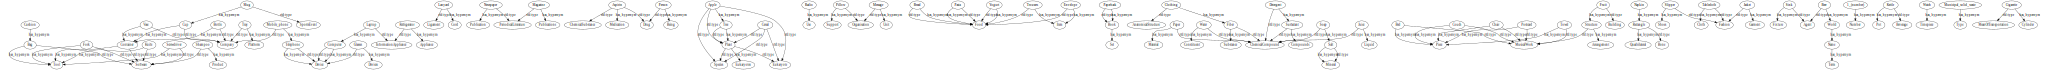

In [4]:
all_hypernyms = defaultdict(lambda: 0)
all_edges = set()
for w in frame_lemmas:
    id = wrapper.get_id(w)
    hypernyms, edges = wrapper.get_all_types(id)
    print(w, id, hypernyms)
    for w in hypernyms:
        all_hypernyms[w] += 1
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [5]:
sorted_hypernyms = sorted([(k,v) for k,v in all_hypernyms.items()], key=lambda el: el[1], reverse=True)
print(sorted_hypernyms)

[('http://dbpedia.org/ontology/Software', 10), ('http://dbpedia.org/resource/Tool', 9), ('http://dbpedia.org/ontology/MusicalWork', 6), ('http://dbpedia.org/ontology/ChemicalCompound', 6), ('http://dbpedia.org/ontology/Company', 6), ('http://dbpedia.org/ontology/Device', 6), ('http://dbpedia.org/resource/Piece', 5), ('http://dbpedia.org/ontology/Food', 5), ('http://dbpedia.org/resource/Device', 5), ('http://dbpedia.org/resource/Container', 4), ('http://dbpedia.org/resource/Food', 3), ('http://dbpedia.org/ontology/Fashion', 3), ('http://dbpedia.org/ontology/Organisation', 2), ('http://dbpedia.org/ontology/Agent', 2), ('http://dbpedia.org/ontology/Drug', 2), ('http://dbpedia.org/ontology/Species', 2), ('http://dbpedia.org/ontology/Plant', 2), ('http://dbpedia.org/ontology/Eukaryote', 2), ('http://dbpedia.org/ontology/InformationAppliance', 2), ('http://dbpedia.org/ontology/PeriodicalLiterature', 2), ('http://dbpedia.org/resource/Item', 2), ('http://dbpedia.org/resource/Set', 2), ('http:/